In [1]:
import pandas as pd

In [90]:
# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
mpl.rc('font',family='Malgun Gothic')   # 맑은 고딕으로 그래프한글설정

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

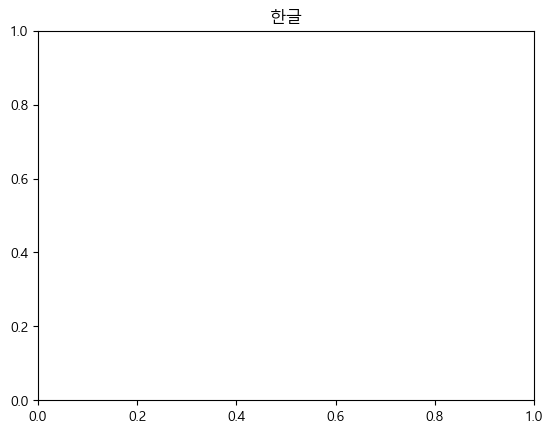

In [91]:
plt.title("한글")
plt.show()

In [53]:
df =pd.read_csv("./03_암발생자수_.csv",encoding='cp949')

In [54]:
#열명변경
df.columns = ["암종별", "성별", "연령별", "발생자수", "조발생률"]

#열 데이터 타입확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   암종별     1501 non-null   object
 1   성별      1501 non-null   object
 2   연령별     1501 non-null   object
 3   발생자수    1501 non-null   object
 4   조발생률    1501 non-null   object
dtypes: object(5)
memory usage: 58.8+ KB


In [7]:

df.index

RangeIndex(start=0, stop=1501, step=1)

In [8]:
#loc 행,열조회
df.loc[0, '암종별']

'24개 암종별'

In [10]:
#iloc는 위치값을적어줘야함
df.iloc[0, 0]

'24개 암종별'

In [55]:
df = df.loc[1:, :]
df

,암종별,성별,연령별,발생자수,조발생률
1,모든 암(C00-C96),계,계,254718,496.2
2,모든 암(C00-C96),계,0-4세,406,21.3
3,모든 암(C00-C96),계,5-9세,220,9.5
4,모든 암(C00-C96),계,10-14세,300,13.0
5,모든 암(C00-C96),계,15-19세,583,21.4
...,...,...,...,...,...
1496,기타 암(Re. C00-C96),여자,70-74세,1096,107.6
1497,기타 암(Re. C00-C96),여자,75-79세,1357,146.3
1498,기타 암(Re. C00-C96),여자,80-84세,1420,212.1
1499,기타 암(Re. C00-C96),여자,85세이상,1273,243.6


In [6]:
#특정변수조회
df['암종별']

0                 24개 암종별
1           모든 암(C00-C96)
2           모든 암(C00-C96)
3           모든 암(C00-C96)
4           모든 암(C00-C96)
              ...        
1496    기타 암(Re. C00-C96)
1497    기타 암(Re. C00-C96)
1498    기타 암(Re. C00-C96)
1499    기타 암(Re. C00-C96)
1500    기타 암(Re. C00-C96)
Name: 암종별, Length: 1501, dtype: object

In [14]:
#특정행 열 자료추출
df.loc[[1,3],['암종별','발생자수']]

,암종별,발생자수
1,모든 암(C00-C96),254718
3,모든 암(C00-C96),220


In [56]:
#ifelse?
import numpy as np

In [23]:
df['발생자수'] = np.where(df['발생자수']== '-',0,df['발생자수'])
df['조발생률'] = np.where(df['조발생률']== '-',0,df['조발생률'])

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 1 to 1500
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   암종별     1500 non-null   object
 1   성별      1500 non-null   object
 2   연령별     1500 non-null   object
 3   발생자수    1500 non-null   object
 4   조발생률    1500 non-null   object
dtypes: object(5)
memory usage: 58.7+ KB


In [21]:
#데이터타입 변경1
df['발생자수'] = df['발생자수'].astype('int')
#데이터타입 변경2
df['조발생률'] = pd.to_numeric(df['조발생률'])


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 1 to 1500
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   암종별     1500 non-null   object 
 1   성별      1500 non-null   object 
 2   연령별     1500 non-null   object 
 3   발생자수    1500 non-null   int32  
 4   조발생률    1500 non-null   float64
dtypes: float64(1), int32(1), object(3)
memory usage: 52.9+ KB


In [50]:
#암종류.중복삭제(list로보기)
lt = list(df['암종별'].unique())
lt

['모든 암(C00-C96)',
 '입술, 구강 및 인두(C00-C14)',
 '식도(C15)',
 '위(C16)',
 '대장(C18-C20)',
 '간(C22)',
 '담낭 및 기타 담도(C23-C24)',
 '췌장(C25)',
 '후두(C32)',
 '폐(C33-C34)',
 '유방(C50)',
 '자궁경부(C53)',
 '자궁체부(C54)',
 '난소(C56)',
 '전립선(C61)',
 '고환(C62)',
 '신장(C64)',
 '방광(C67)',
 '뇌 및 중추신경계(C70-C72)',
 '갑상선(C73)',
 '호지킨 림프종(C81)',
 '비호지킨 림프종(C82-C86,C96)',
 '다발성 골수종(C90)',
 '백혈병(C91-C95)',
 '기타 암(Re. C00-C96)']

In [35]:
#문자타입을 정수타입으로 바꾸기
lt = [int(s)for s in lt]
lt

[96,
 14,
 15,
 16,
 20,
 22,
 24,
 25,
 32,
 34,
 50,
 53,
 54,
 56,
 61,
 62,
 64,
 67,
 72,
 73,
 81,
 96,
 90,
 95,
 96]

In [59]:
temp = list(df['발생자수'])
temp

['254718',
 '406',
 '220',
 '300',
 '583',
 '1344',
 '2896',
 '4652',
 '8845',
 '12427',
 '17759',
 '22061',
 '28454',
 '33079',
 '29031',
 '29796',
 '29324',
 '20664',
 '12874',
 '3',
 '134180',
 '233',
 '127',
 '157',
 '273',
 '463',
 '895',
 '1415',
 '2673',
 '3745',
 '5728',
 '9182',
 '14697',
 '19504',
 '18896',
 '19721',
 '18651',
 '11967',
 '5851',
 '2',
 '120538',
 '173',
 '93',
 '143',
 '310',
 '881',
 '2001',
 '3237',
 '6172',
 '8682',
 '12031',
 '12879',
 '13757',
 '13575',
 '10135',
 '10075',
 '10673',
 '8697',
 '7023',
 '1',
 '3969',
 '0',
 '1',
 '7',
 '13',
 '32',
 '45',
 '49',
 '112',
 '158',
 '300',
 '416',
 '556',
 '628',
 '470',
 '415',
 '392',
 '228',
 '147',
 '0',
 '2863',
 '0',
 '1',
 '3',
 '7',
 '18',
 '24',
 '29',
 '60',
 '102',
 '203',
 '295',
 '424',
 '497',
 '384',
 '301',
 '293',
 '150',
 '72',
 '0',
 '1106',
 '0',
 '0',
 '4',
 '6',
 '14',
 '21',
 '20',
 '52',
 '56',
 '97',
 '121',
 '132',
 '131',
 '86',
 '114',
 '99',
 '78',
 '75',
 '0',
 '2870',
 '0',
 '0',

In [62]:
temp = list(df['발생자수'])
temp = [ int(s.replace('-','0'))for s in temp]
df['발생자수'] = temp
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 1 to 1500
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   암종별     1500 non-null   object
 1   성별      1500 non-null   object
 2   연령별     1500 non-null   object
 3   발생자수    1500 non-null   int64 
 4   조발생률    1500 non-null   object
dtypes: int64(1), object(4)
memory usage: 58.7+ KB


In [70]:
temp = list(df['조발생률'])
temp = [ float(s.replace('-','0'))for s in temp]
df['조발생률'] = temp
df.info()

AttributeError: 'float' object has no attribute 'replace'

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 1 to 1500
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   암종별     1500 non-null   object 
 1   성별      1500 non-null   object 
 2   연령별     1500 non-null   object 
 3   발생자수    1500 non-null   int64  
 4   조발생률    1500 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 58.7+ KB


In [72]:
df.head()

,암종별,성별,연령별,발생자수,조발생률
1,모든 암(C00-C96),계,계,254718,496.2
2,모든 암(C00-C96),계,0-4세,406,21.3
3,모든 암(C00-C96),계,5-9세,220,9.5
4,모든 암(C00-C96),계,10-14세,300,13.0
5,모든 암(C00-C96),계,15-19세,583,21.4


In [81]:
#R 필터 파이선버전
df1 = df[(df['암종별']=='모든 암(C00-C96)')&(df['연령별'] != '계')& (df['성별'] == '계')]
df1

,암종별,성별,연령별,발생자수,조발생률
2,모든 암(C00-C96),계,0-4세,406,21.3
3,모든 암(C00-C96),계,5-9세,220,9.5
4,모든 암(C00-C96),계,10-14세,300,13.0
5,모든 암(C00-C96),계,15-19세,583,21.4
6,모든 암(C00-C96),계,20-24세,1344,40.1
7,모든 암(C00-C96),계,25-29세,2896,84.4
8,모든 암(C00-C96),계,30-34세,4652,147.6
9,모든 암(C00-C96),계,35-39세,8845,223.3
10,모든 암(C00-C96),계,40-44세,12427,322.2
11,모든 암(C00-C96),계,45-49세,17759,396.5


In [83]:
df1 = df[(df['암종별']=='모든 암(C00-C96)')&(df['연령별'] != '계')& (df['성별'] == '계')][['연령별','발생자수']]
df1

,연령별,발생자수
2,0-4세,406
3,5-9세,220
4,10-14세,300
5,15-19세,583
6,20-24세,1344
7,25-29세,2896
8,30-34세,4652
9,35-39세,8845
10,40-44세,12427
11,45-49세,17759


In [86]:
df1 = df1.set_index('연령별')
df1

,발생자수
연령별,
0-4세,406
5-9세,220
10-14세,300
15-19세,583
20-24세,1344
25-29세,2896
30-34세,4652
35-39세,8845
40-44세,12427


In [89]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 0-4세 to 연령미상
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   발생자수    19 non-null     int64
dtypes: int64(1)
memory usage: 304.0+ bytes


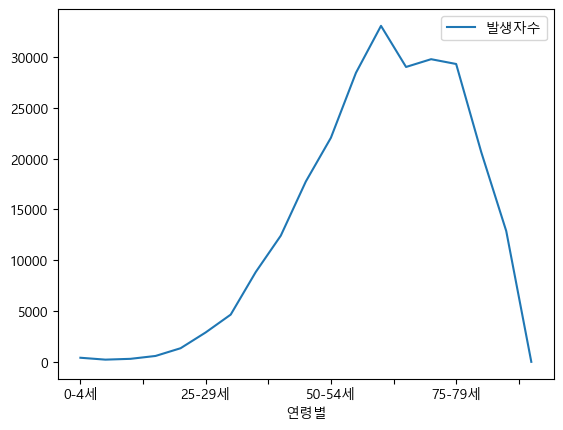

In [92]:
df1.plot()
plt.show()

In [111]:
df2 = df[(df['연령별'] != '계') & (df['암종별'] != '모든 암(C00-C96)' ) &(df['성별'] != '계')]
df2

,암종별,성별,연령별,발생자수,조발생률
82,"입술, 구강 및 인두(C00-C14)",남자,0-4세,0,0.0
83,"입술, 구강 및 인두(C00-C14)",남자,5-9세,1,0.1
84,"입술, 구강 및 인두(C00-C14)",남자,10-14세,3,0.3
85,"입술, 구강 및 인두(C00-C14)",남자,15-19세,7,0.5
86,"입술, 구강 및 인두(C00-C14)",남자,20-24세,18,1.0
...,...,...,...,...,...
1496,기타 암(Re. C00-C96),여자,70-74세,1096,107.6
1497,기타 암(Re. C00-C96),여자,75-79세,1357,146.3
1498,기타 암(Re. C00-C96),여자,80-84세,1420,212.1
1499,기타 암(Re. C00-C96),여자,85세이상,1273,243.6


In [112]:
df2.groupby(['암종별','성별']).mean()[['발생자수','조발생률']]


발생자수        조발생률
암종별                   성별                         
간(C22)                남자   607.421053   63.189474
                      여자   213.894737   20.931579
갑상선(C73)              남자   395.578947   23.210526
                      여자  1218.947368   69.421053
고환(C62)               남자    17.105263    1.031579
                      여자     0.000000    0.000000
기타 암(Re. C00-C96)     남자   548.578947   68.663158
                      여자   542.736842   52.952632
난소(C56)               남자     0.000000    0.000000
                      여자   152.000000   10.331579
뇌 및 중추신경계(C70-C72)    남자    56.315789    5.436842
                      여자    47.947368    3.936842
다발성 골수종(C90)          남자    52.473684    6.189474
                      여자    43.894737    3.942105
담낭 및 기타 담도(C23-C24)   남자   205.052632   30.721053
                      여자   183.526316   20.842105
대장(C18-C20)           남자   901.000000  101.589474
                      여자   626.894737   59.568421
방광(C67)               남자   209.684211   31.547368
                      여자    47.947368    5.210526
백혈병(C91-C95)          남자   110.947368   10.963158
                      여자    85.789474    7.021053
비호지킨 림프종(C82-C86,C96) 남자   164.052632   17.447368
                      여자   119.526316   10.294737
식도(C15)               남자   135.421053   15.984211
                      여자    15.631579    1.331579
신장(C64)               남자   218.684211   18.568421
                      여자    98.473684    7.505263
위(C16)                남자  1040.052632  112.547368
                      여자   512.210526   45.457895
유방(C50)               남자     5.947368    0.715789
                      여자  1306.315789   77.063158
입술, 구강 및 인두(C00-C14)  남자   150.684211   14.226316
                      여자    58.210526    4.647368
자궁경부(C53)             남자     0.000000    0.000000
                      여자   172.263158   11.510526
자궁체부(C54)             남자     0.000000    0.000000
                      여자   173.000000   10.336842
전립선(C61)              남자   884.368421  119.973684
                      여자     0.000000    0.000000
췌장(C25)               남자   218.421053   27.663158
                      여자   207.842105   21.426316
폐(C33-C34)            남자  1070.052632  153.015789
                      여자   506.789474   48.173684
호지킨 림프종(C81)          남자     9.526316    0.678947
                      여자     6.684211    0.515789
후두(C32)               남자    60.736842    7.105263
                      여자     3.578947    0.347368

In [98]:
import seaborn as sns

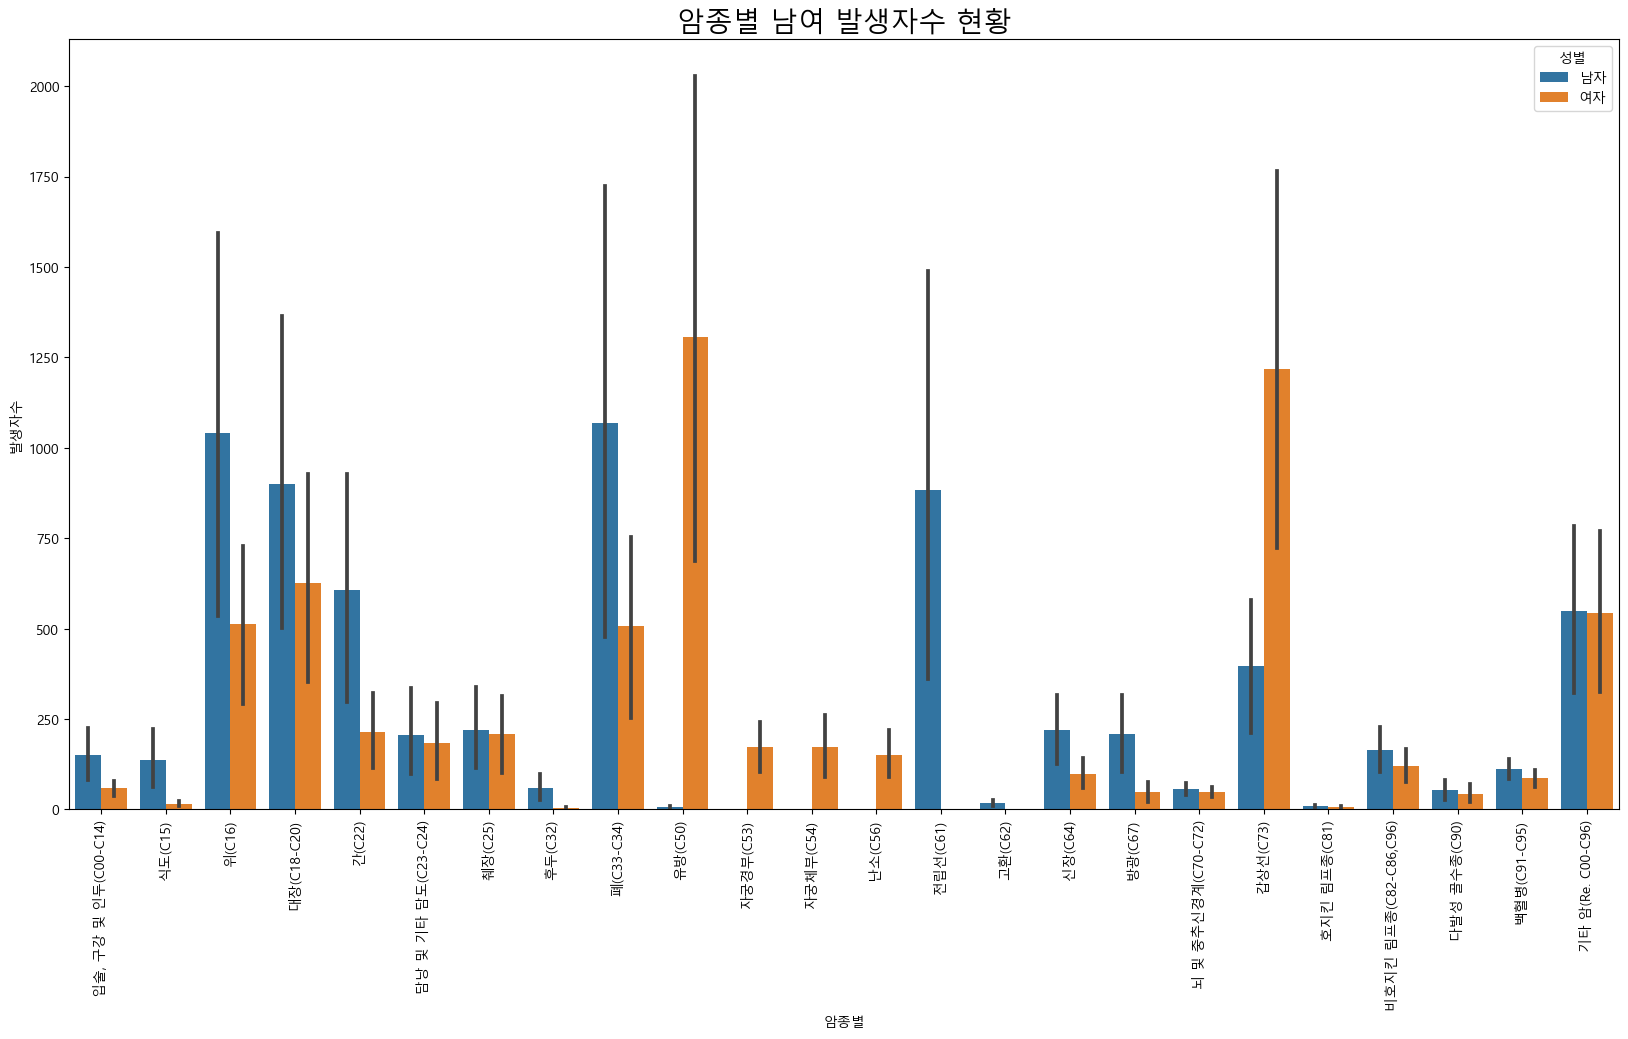

In [113]:
plt.figure(figsize=(20,10))
sns.barplot(x='암종별',y='발생자수',hue='성별',data=df2)
plt.title('암종별 남여 발생자수 현황', fontsize=20)
plt.xticks(rotation=90)
plt.show()